# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?' 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key +'&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = requests.get(city_url).json()["coord"]["lat"]
        city_lng = requests.get(city_url).json()["coord"]["lon"]
        city_max_temp = requests.get(city_url).json()["main"]["temp_max"]
        city_humidity = requests.get(city_url).json()["main"]["humidity"]
        city_clouds = requests.get(city_url).json()["clouds"]["all"]
        city_wind = requests.get(city_url).json()["wind"]["speed"]
        city_country = requests.get(city_url).json()["sys"]["country"]
        city_date = requests.get(city_url).json()["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | kanniyakumari
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | caravelas
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | abalak
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | comarapa
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | truth or consequences
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | myaundzha
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | saleaula
City not found. Skipping...
Processing Re

Processing Record 35 of Set 4 | carballo
Processing Record 36 of Set 4 | klaksvik
Processing Record 37 of Set 4 | vestmanna
Processing Record 38 of Set 4 | bilma
Processing Record 39 of Set 4 | mayya
Processing Record 40 of Set 4 | carutapera
Processing Record 41 of Set 4 | yining
Processing Record 42 of Set 4 | geraldton
Processing Record 43 of Set 4 | amapa
Processing Record 44 of Set 4 | yanan
City not found. Skipping...
Processing Record 45 of Set 4 | fort nelson
Processing Record 46 of Set 4 | port moresby
Processing Record 47 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | chokurdakh
Processing Record 0 of Set 5 | oistins
Processing Record 1 of Set 5 | bundaberg
Processing Record 2 of Set 5 | lasa
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | khonuu
City not found. Skipping...
Processing Record 5 of Set 5 | rovira
Processing Record 6 of Set 5 | camopi
Processing Record 7 of S

Processing Record 22 of Set 8 | suntar
Processing Record 23 of Set 8 | yar-sale
Processing Record 24 of Set 8 | chicama
Processing Record 25 of Set 8 | mnogovershinnyy
Processing Record 26 of Set 8 | champerico
Processing Record 27 of Set 8 | acopiara
Processing Record 28 of Set 8 | vila franca do campo
Processing Record 29 of Set 8 | constitucion
Processing Record 30 of Set 8 | aklavik
Processing Record 31 of Set 8 | broome
Processing Record 32 of Set 8 | karatuzskoye
Processing Record 33 of Set 8 | iguape
Processing Record 34 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 35 of Set 8 | sussex
Processing Record 36 of Set 8 | port blair
Processing Record 37 of Set 8 | barentu
Processing Record 38 of Set 8 | dire
Processing Record 39 of Set 8 | flin flon
Processing Record 40 of Set 8 | teahupoo
Processing Record 41 of Set 8 | varzea da palma
Processing Record 42 of Set 8 | palora
Processing Record 43 of Set 8 | virginia beach
Processing Record 44 of Set 8 | farsun

Processing Record 13 of Set 12 | yambio
Processing Record 14 of Set 12 | vokhtoga
Processing Record 15 of Set 12 | qarqin
Processing Record 16 of Set 12 | parabel
Processing Record 17 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 18 of Set 12 | richards bay
Processing Record 19 of Set 12 | umuahia
Processing Record 20 of Set 12 | korla
Processing Record 21 of Set 12 | husavik
Processing Record 22 of Set 12 | gouyave
Processing Record 23 of Set 12 | kencong
Processing Record 24 of Set 12 | watsa
Processing Record 25 of Set 12 | nemuro
Processing Record 26 of Set 12 | caraquet
Processing Record 27 of Set 12 | le vauclin
Processing Record 28 of Set 12 | sorland
Processing Record 29 of Set 12 | nguiu
City not found. Skipping...
Processing Record 30 of Set 12 | darhan
Processing Record 31 of Set 12 | san nicolas
Processing Record 32 of Set 12 | bouafle
Processing Record 33 of Set 12 | tahe
Processing Record 34 of Set 12 | darfield
Processing Record 35 of Set 12 | wanni

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,274.41,79,100,1.34,US,1675822296
1,kanniyakumari,8.0833,77.5667,297.84,71,7,6.05,IN,1675823007
2,lavrentiya,65.5833,-171.0000,247.43,92,97,1.24,RU,1675822687
3,yellowknife,62.4560,-114.3525,253.46,84,75,3.09,CA,1675822520
4,caravelas,-17.7125,-39.2481,298.37,81,4,3.61,BR,1675822672


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,274.41,79,100,1.34,US,1675822296
1,kanniyakumari,8.0833,77.5667,297.84,71,7,6.05,IN,1675823007
2,lavrentiya,65.5833,-171.0000,247.43,92,97,1.24,RU,1675822687
3,yellowknife,62.4560,-114.3525,253.46,84,75,3.09,CA,1675822520
4,caravelas,-17.7125,-39.2481,298.37,81,4,3.61,BR,1675822672


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

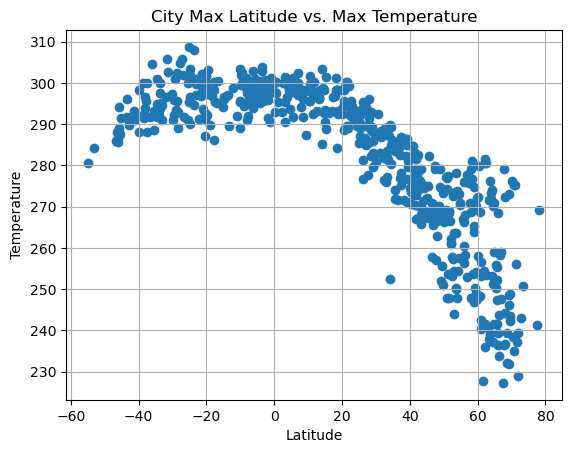

In [29]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Max Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

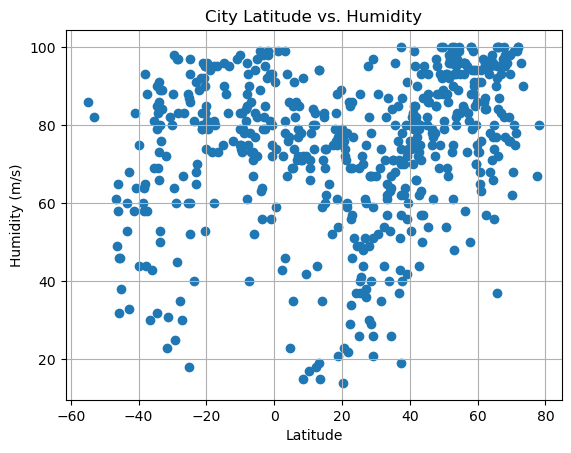

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

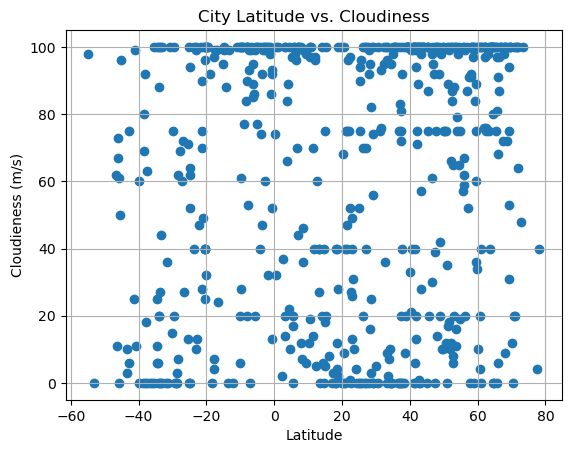

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudieness (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

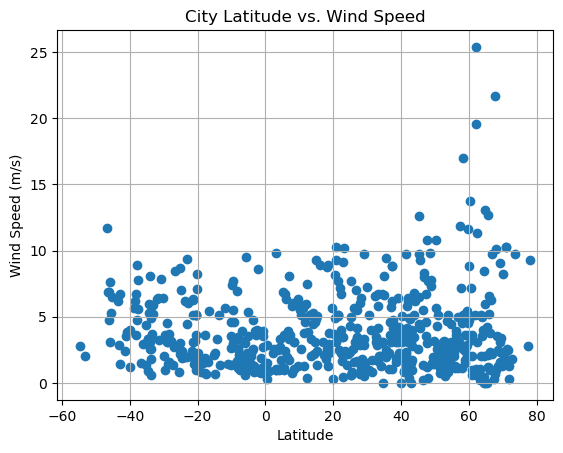

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def reglinefun(x_values, y_values, x_label, y_label, Title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq(10,12),fontsize=12,color='red')
    plt.x_label(x_label)
    plt.y_label(y_label)
    plt.title(Title)
    return plt.show

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,274.41,79,100,1.34,US,1675822296
1,kanniyakumari,8.0833,77.5667,297.84,71,7,6.05,IN,1675823007
2,lavrentiya,65.5833,-171.0000,247.43,92,97,1.24,RU,1675822687
3,yellowknife,62.4560,-114.3525,253.46,84,75,3.09,CA,1675822520
5,guerrero negro,27.9769,-114.0611,291.42,30,0,2.89,MX,1675822610


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,caravelas,-17.7125,-39.2481,298.37,81,4,3.61,BR,1675822672
6,mataura,-46.1927,168.8643,285.64,65,73,4.79,NZ,1675822524
8,busselton,-33.6500,115.3333,297.57,50,0,2.56,AU,1675822517
9,puerto ayora,-0.7393,-90.3518,299.57,93,52,2.68,EC,1675822580
10,comarapa,-17.9000,-64.4833,286.09,95,97,0.73,BO,1675823019


###  Temperature vs. Latitude Linear Regression Plot

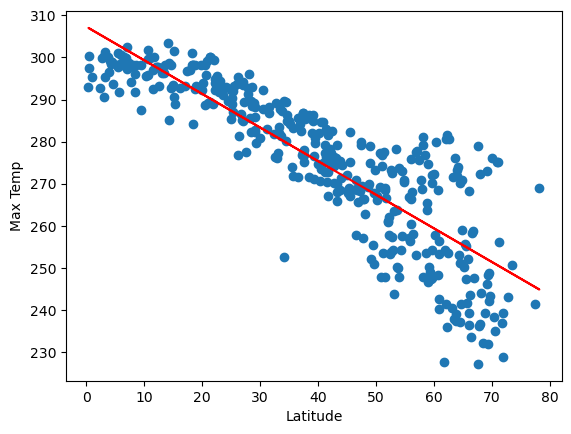

R-value = -0.8603537889952282


In [66]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values =northern_hemi_df["Max Temp"]

##
(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values* slope+ intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"R-value = {rvalue}")

**Discussion about the linear relationship:** #Next Submission

### Humidity vs. Latitude Linear Regression Plot

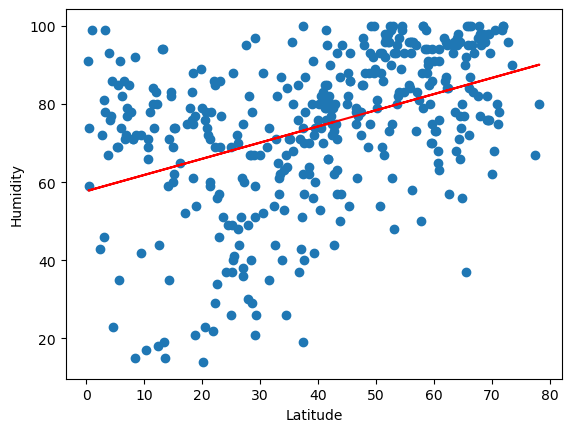

R-value = 0.41824296548730866


In [68]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values =northern_hemi_df["Humidity"]

##
(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values* slope+ intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R-value = {rvalue}")

The r-value is: 0.0002808747046324607


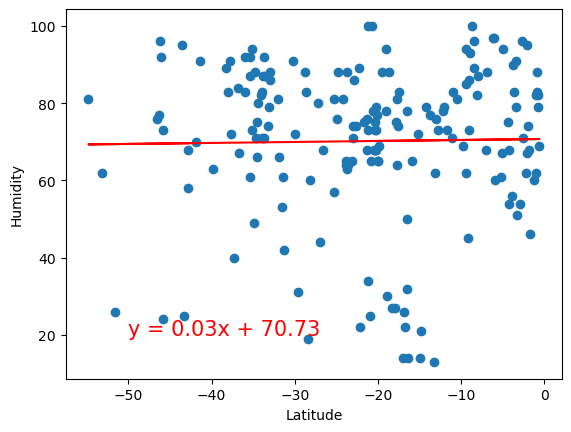

In [18]:
# Southern Hemisphere
# Next Submission Starting Point

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


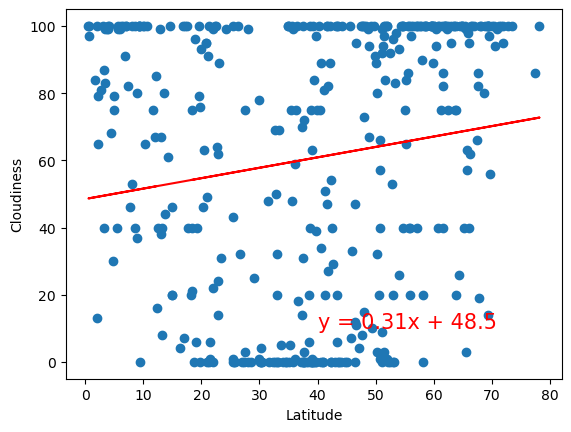

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


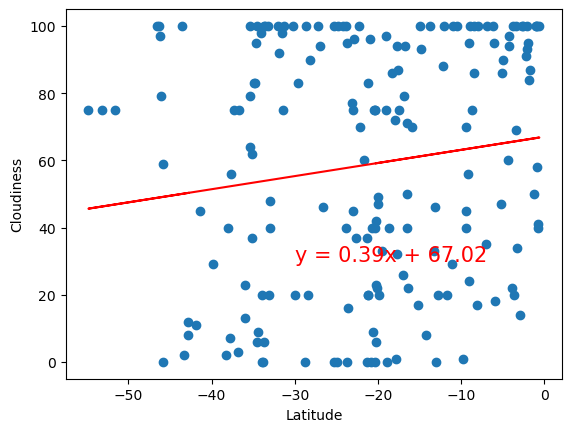

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


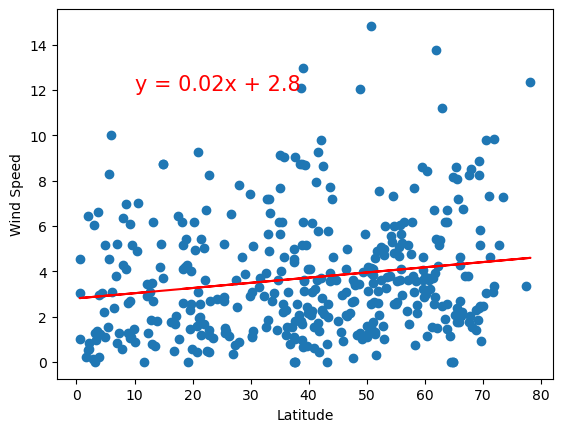

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


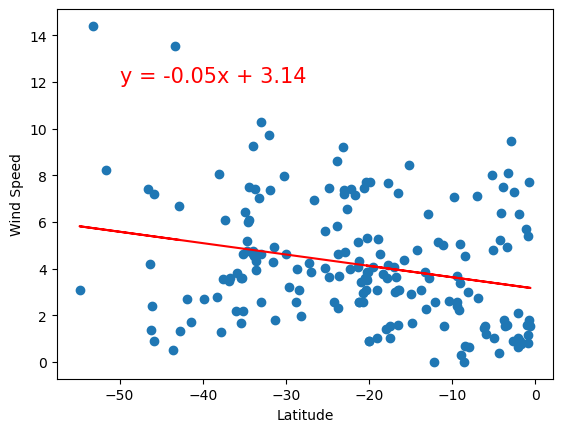

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE